# Bank Customer Churn Prediction - EDA

## Dependencies

In [1]:
import pandas as pd
import numpy as np

# Matplotlib for visualization
import  matplotlib.pyplot  as  plt
# display plots in the notebook
%matplotlib inline


# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# store elements as dictionary keys and their counts as dictionary values
from collections import Counter

In [2]:
# If you are runnig "Dark Reader" on Chrome,install "jupyterthemes 
#  and run these lines so the legends and axes become visible
## from jupyterthemes import jtplot
## jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

# To reset default matplotlib rcParams
## jtplot.reset()


# Data Source

[Kaggle - Churn Modelling Calssification Data Set](https://www.kaggle.com/shrutimechlearn/churn-modelling)

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

It consists of 10,000 records  with demographic and bank history information from customers from three countries, France, Germany and Spain,



# Exploratory Analysis

### Read the CSV and Perform Basic Data Cleaning

In [3]:
# Load the dataset
df = pd.read_csv("../data/Churn_Modelling.csv")
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There are no "nulls" in our dataframe.

In [5]:
# List number of unique customer IDs
df.CustomerId.nunique()

10000

All Cusuomer IDs are unique --> that also means no duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

#### Unused Features

To make dataframe easily readable we will drop features not needed for machine learning:

* RowNumber
* CustomerId
* Surname

In [7]:
# Drop unused features
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Distributions of Numeric Features

#### Plotting Histogram grid

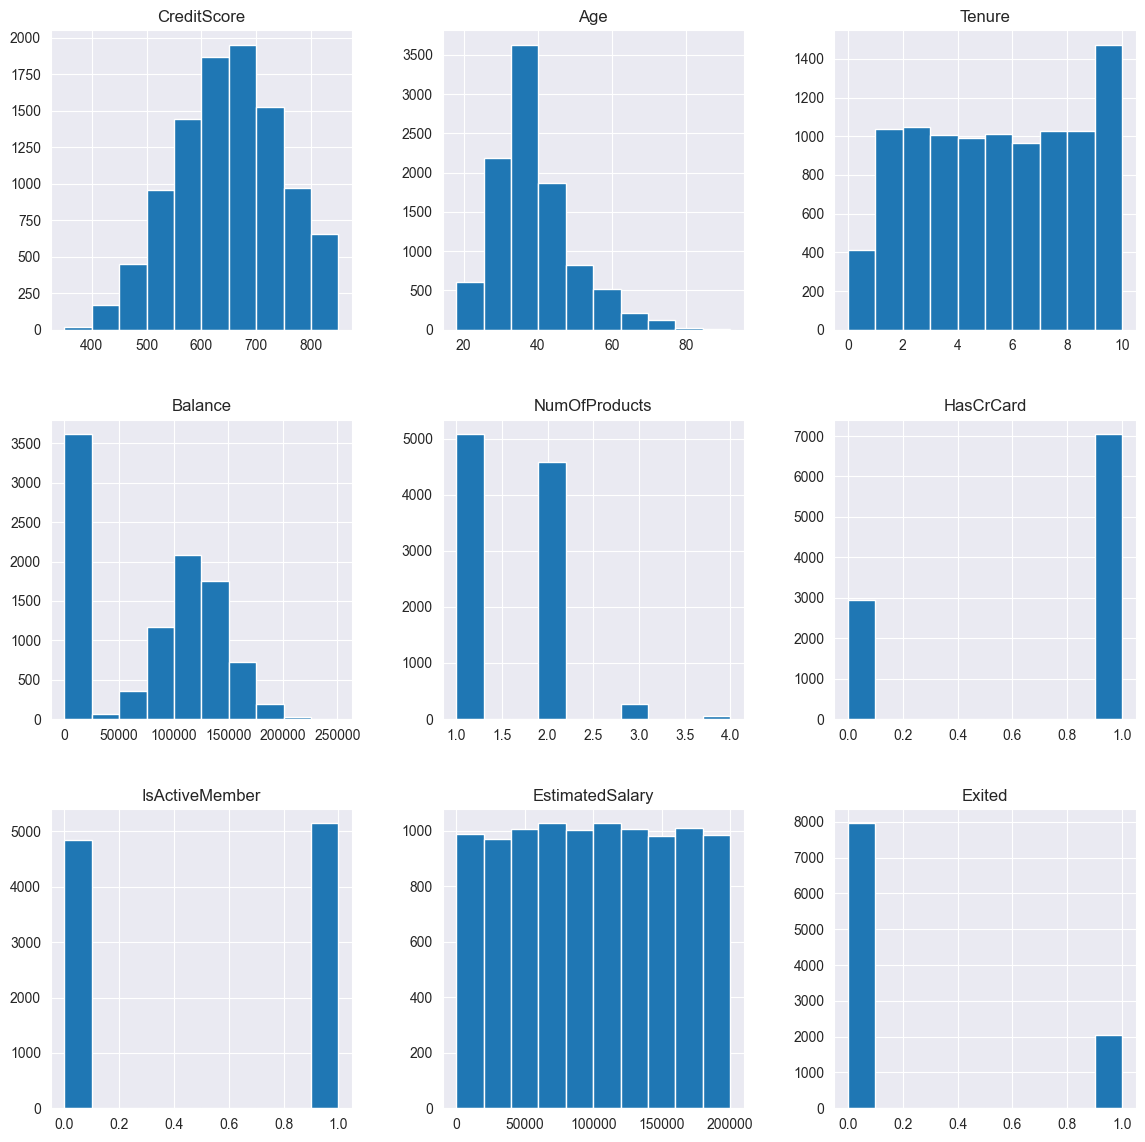

In [8]:
# Plot histogram grid
df.hist(figsize=(14,14))

plt.show()

#### Summary statistics for the numeric features

In [9]:
# Summarize numerical features
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From the summary statistics and the histograms we can conclude that all features look OK. We do not see any extreme values for any feature.

### Distributions of Categorical Features

In [10]:
# Summarize categorical features
df.describe(include=['object'])

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


This shows us the number of unique classes for each feature. For example, there are more males (5457) than females. And France is most common of 3 geographies in our dataframe. There are no sparse classes.

Let's visualize this information.

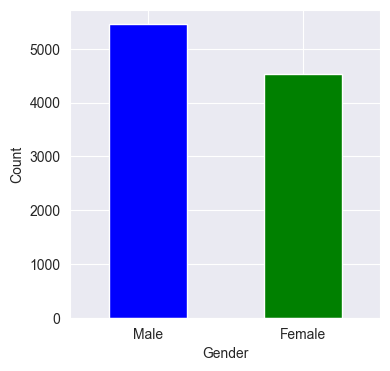

Counter({'Male': 5457, 'Female': 4543})

In [11]:
# Bar plot for "Gender"
plt.figure(figsize=(4,4))
df['Gender'].value_counts().plot.bar(color=['b', 'g'])
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.show()

# Display count of each class
Counter(df.Gender)

In our data sample there are more males than females.

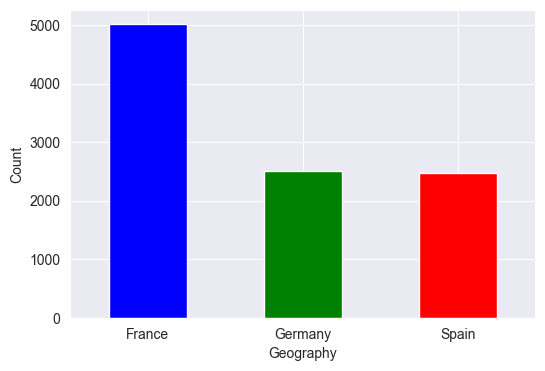

Counter({'France': 5014, 'Germany': 2509, 'Spain': 2477})

In [12]:
# Bar plot for "Geography"
plt.figure(figsize=(6,4))
df['Geography'].value_counts().plot.bar(color=['b', 'g', 'r'])
plt.ylabel('Count')
plt.xlabel('Geography')
plt.xticks(rotation=0)
plt.show()

# Display count of each class
Counter(df.Geography)

Majority of customers are from France, about 50%, and from Germany and Spain around 25% each.

### Churn Segmentation by Gender¶

In [13]:
# Segment "Exited" by gender and display the frequency and percentage within each class
grouped = df.groupby('Gender')['Exited'].agg(Count='value_counts')
grouped

Count
Gender Exited       
Female 0        3404
       1        1139
Male   0        4559
       1         898

In [14]:
# Reorganize dataframe for plotting count
dfgc = grouped
dfgc = dfgc.pivot_table(values='Count', index='Gender', columns=['Exited'])
dfgc

Exited,0,1
Gender,,
Female,3404.0,1139.0
Male,4559.0,898.0


In [15]:
# Calculate percentage within each class
dfgp = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgp.rename(columns={'Count': 'Percentage'}, inplace=True)
dfgp

Percentage
Gender Gender Exited            
Female Female 0            74.93
              1            25.07
Male   Male   0            83.54
              1            16.46

In [16]:
# Reorganize dataframe for plotting percentage
dfgp = dfgp.pivot_table(values='Percentage', index='Gender', columns=['Exited'])
dfgp

Exited,0,1
Gender,,
Female,74.93,25.07
Male,83.54,16.46


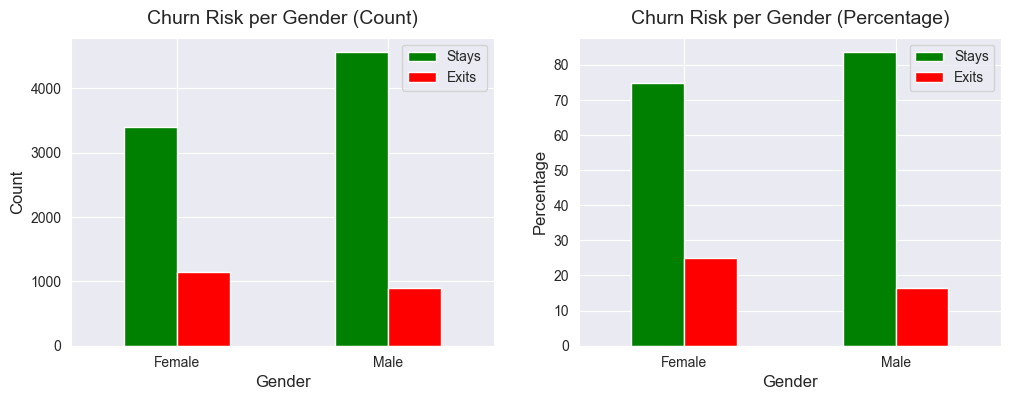

In [17]:
# Churn distribution by gender, count + percentage

labels= ['Stays', 'Exits']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dfgc.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Gender', size=12)


dfgp.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Gender (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Gender', size=12)

plt.show()


In percentage females are more likely to leave the bank; 25% comparing to males, 16%.

### Churn Segmentation by Geography¶

In [18]:
# Segment "Exited" by geography and display the frequency and percentage within each class
grouped = df.groupby('Geography')['Exited'].agg(Count='value_counts')
grouped

Count
Geography Exited       
France    0        4204
          1         810
Germany   0        1695
          1         814
Spain     0        2064
          1         413

In [19]:
# Reorganize dataframe for plotting count
dfgeoc = grouped
dfgeoc = dfgeoc.pivot_table(values='Count', index='Geography', columns=['Exited'])
dfgeoc

Exited,0,1
Geography,,
France,4204.0,810.0
Germany,1695.0,814.0
Spain,2064.0,413.0


In [20]:
# Calculate percentage within each class
dfgeop = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgeop.rename(columns={'Count': 'Percentage'}, inplace=True)
dfgeop

Percentage
Geography Geography Exited            
France    France    0            83.85
                    1            16.15
Germany   Germany   0            67.56
                    1            32.44
Spain     Spain     0            83.33
                    1            16.67

In [21]:
# Reorganize dataframe for plotting percentage
dfgeop = dfgeop.pivot_table(values='Percentage', index='Geography', columns=['Exited'])
dfgeop

Exited,0,1
Geography,,
France,83.85,16.15
Germany,67.56,32.44
Spain,83.33,16.67


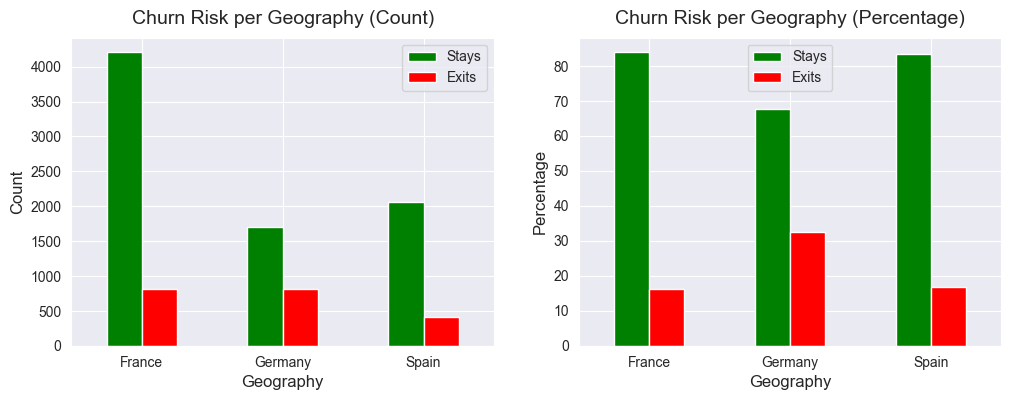

In [22]:
# Churn distribution by geography, count + percentage

labels= ['Stays', 'Exits']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dfgeoc.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Geography (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('Geography', size=12)


dfgeop.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Geography (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('Geography', size=12)

plt.show()

In [36]:
df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0



The smallest number of customers are from Germany but it looks that they are most likely to leave the bank. Almost one third of German customers in our sample left the bank.

## Correlations

In [43]:
# 1. Convert categorical strings to numeric dummy variables
# drop_first=True prevents redundant info (e.g., Male/Female only needs one column)
df_encoded = pd.get_dummies(df, drop_first=True)

# 2. Calculate correlations (pandas 2.0+ requires numeric_only=True to avoid errors)
correlations = df_encoded.corr(numeric_only=True)

# 3. Sort features by their correlation with "Exited"
# This now includes your categorical data transformed into numeric dummies
sort_corr_cols = correlations.Exited.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols, sort_corr_cols]
sort_corr

,Exited,Age,Geography_Germany,Balance,EstimatedSalary,HasCrCard,Tenure,CreditScore,NumOfProducts,Geography_Spain,Gender_Male,IsActiveMember
Exited,1.000000,0.285323,0.173488,0.118533,0.012097,-0.007138,-0.014001,-0.027094,-0.047820,-0.052667,-0.106512,-0.156128
Age,0.285323,1.000000,0.046897,0.028308,-0.007201,-0.011721,-0.009997,-0.003965,-0.030680,-0.001685,-0.027544,0.085472
Geography_Germany,0.173488,0.046897,1.000000,0.401110,0.010297,0.010577,-0.000567,0.005538,-0.010419,-0.332084,-0.024628,-0.020486
Balance,0.118533,0.028308,0.401110,1.000000,0.012797,-0.014858,-0.012254,0.006268,-0.304180,-0.134892,0.012087,-0.010084
EstimatedSalary,0.012097,-0.007201,0.010297,0.012797,1.000000,-0.009933,0.007784,-0.001384,0.014204,-0.006482,-0.008112,-0.011421
HasCrCard,-0.007138,-0.011721,0.010577,-0.014858,-0.009933,1.000000,0.022583,-0.005458,0.003183,-0.013480,0.005766,-0.011866
Tenure,-0.014001,-0.009997,-0.000567,-0.012254,0.007784,0.022583,1.000000,0.000842,0.013444,0.003868,0.014733,-0.028362
CreditScore,-0.027094,-0.003965,0.005538,0.006268,-0.001384,-0.005458,0.000842,1.000000,0.012238,0.004780,-0.002857,0.025651
NumOfProducts,-0.047820,-0.030680,-0.010419,-0.304180,0.014204,0.003183,0.013444,0.012238,1.000000,0.009039,-0.021859,0.009612
Geography_Spain,-0.052667,-0.001685,-0.332084,-0.134892,-0.006482,-0.013480,0.003868,0.004780,0.009039,1.000000,0.016889,0.016732


Let's use Seaborn's .heatmap() function to visualize the correlation grid.

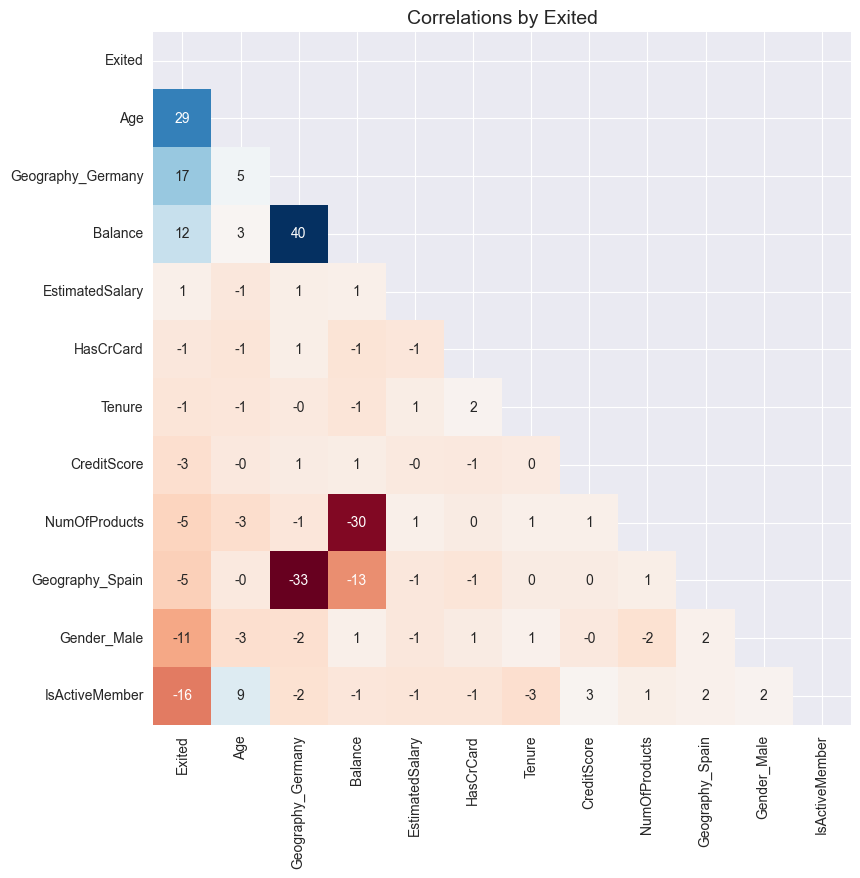

In [44]:
# Generate a mask for the upper triangle
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1

# Make the figsize 9x9
plt.figure(figsize=(9,9))

# Plot heatmap of annotated correlations; change background to white
##with sns.axes_style('white'):
sns.heatmap(sort_corr*100, 
                cmap='RdBu', 
                annot=True,
                fmt='.0f',
                mask=corr_mask,
                cbar=False)
    
plt.title('Correlations by Exited', fontsize=14)
plt.yticks(rotation=0)
plt.show()

Very weak correlations in general. Only weak positive correlation with age, very weak positive correlation with balance, and very weak negative correlations with number of products and membership.

## Pairplot

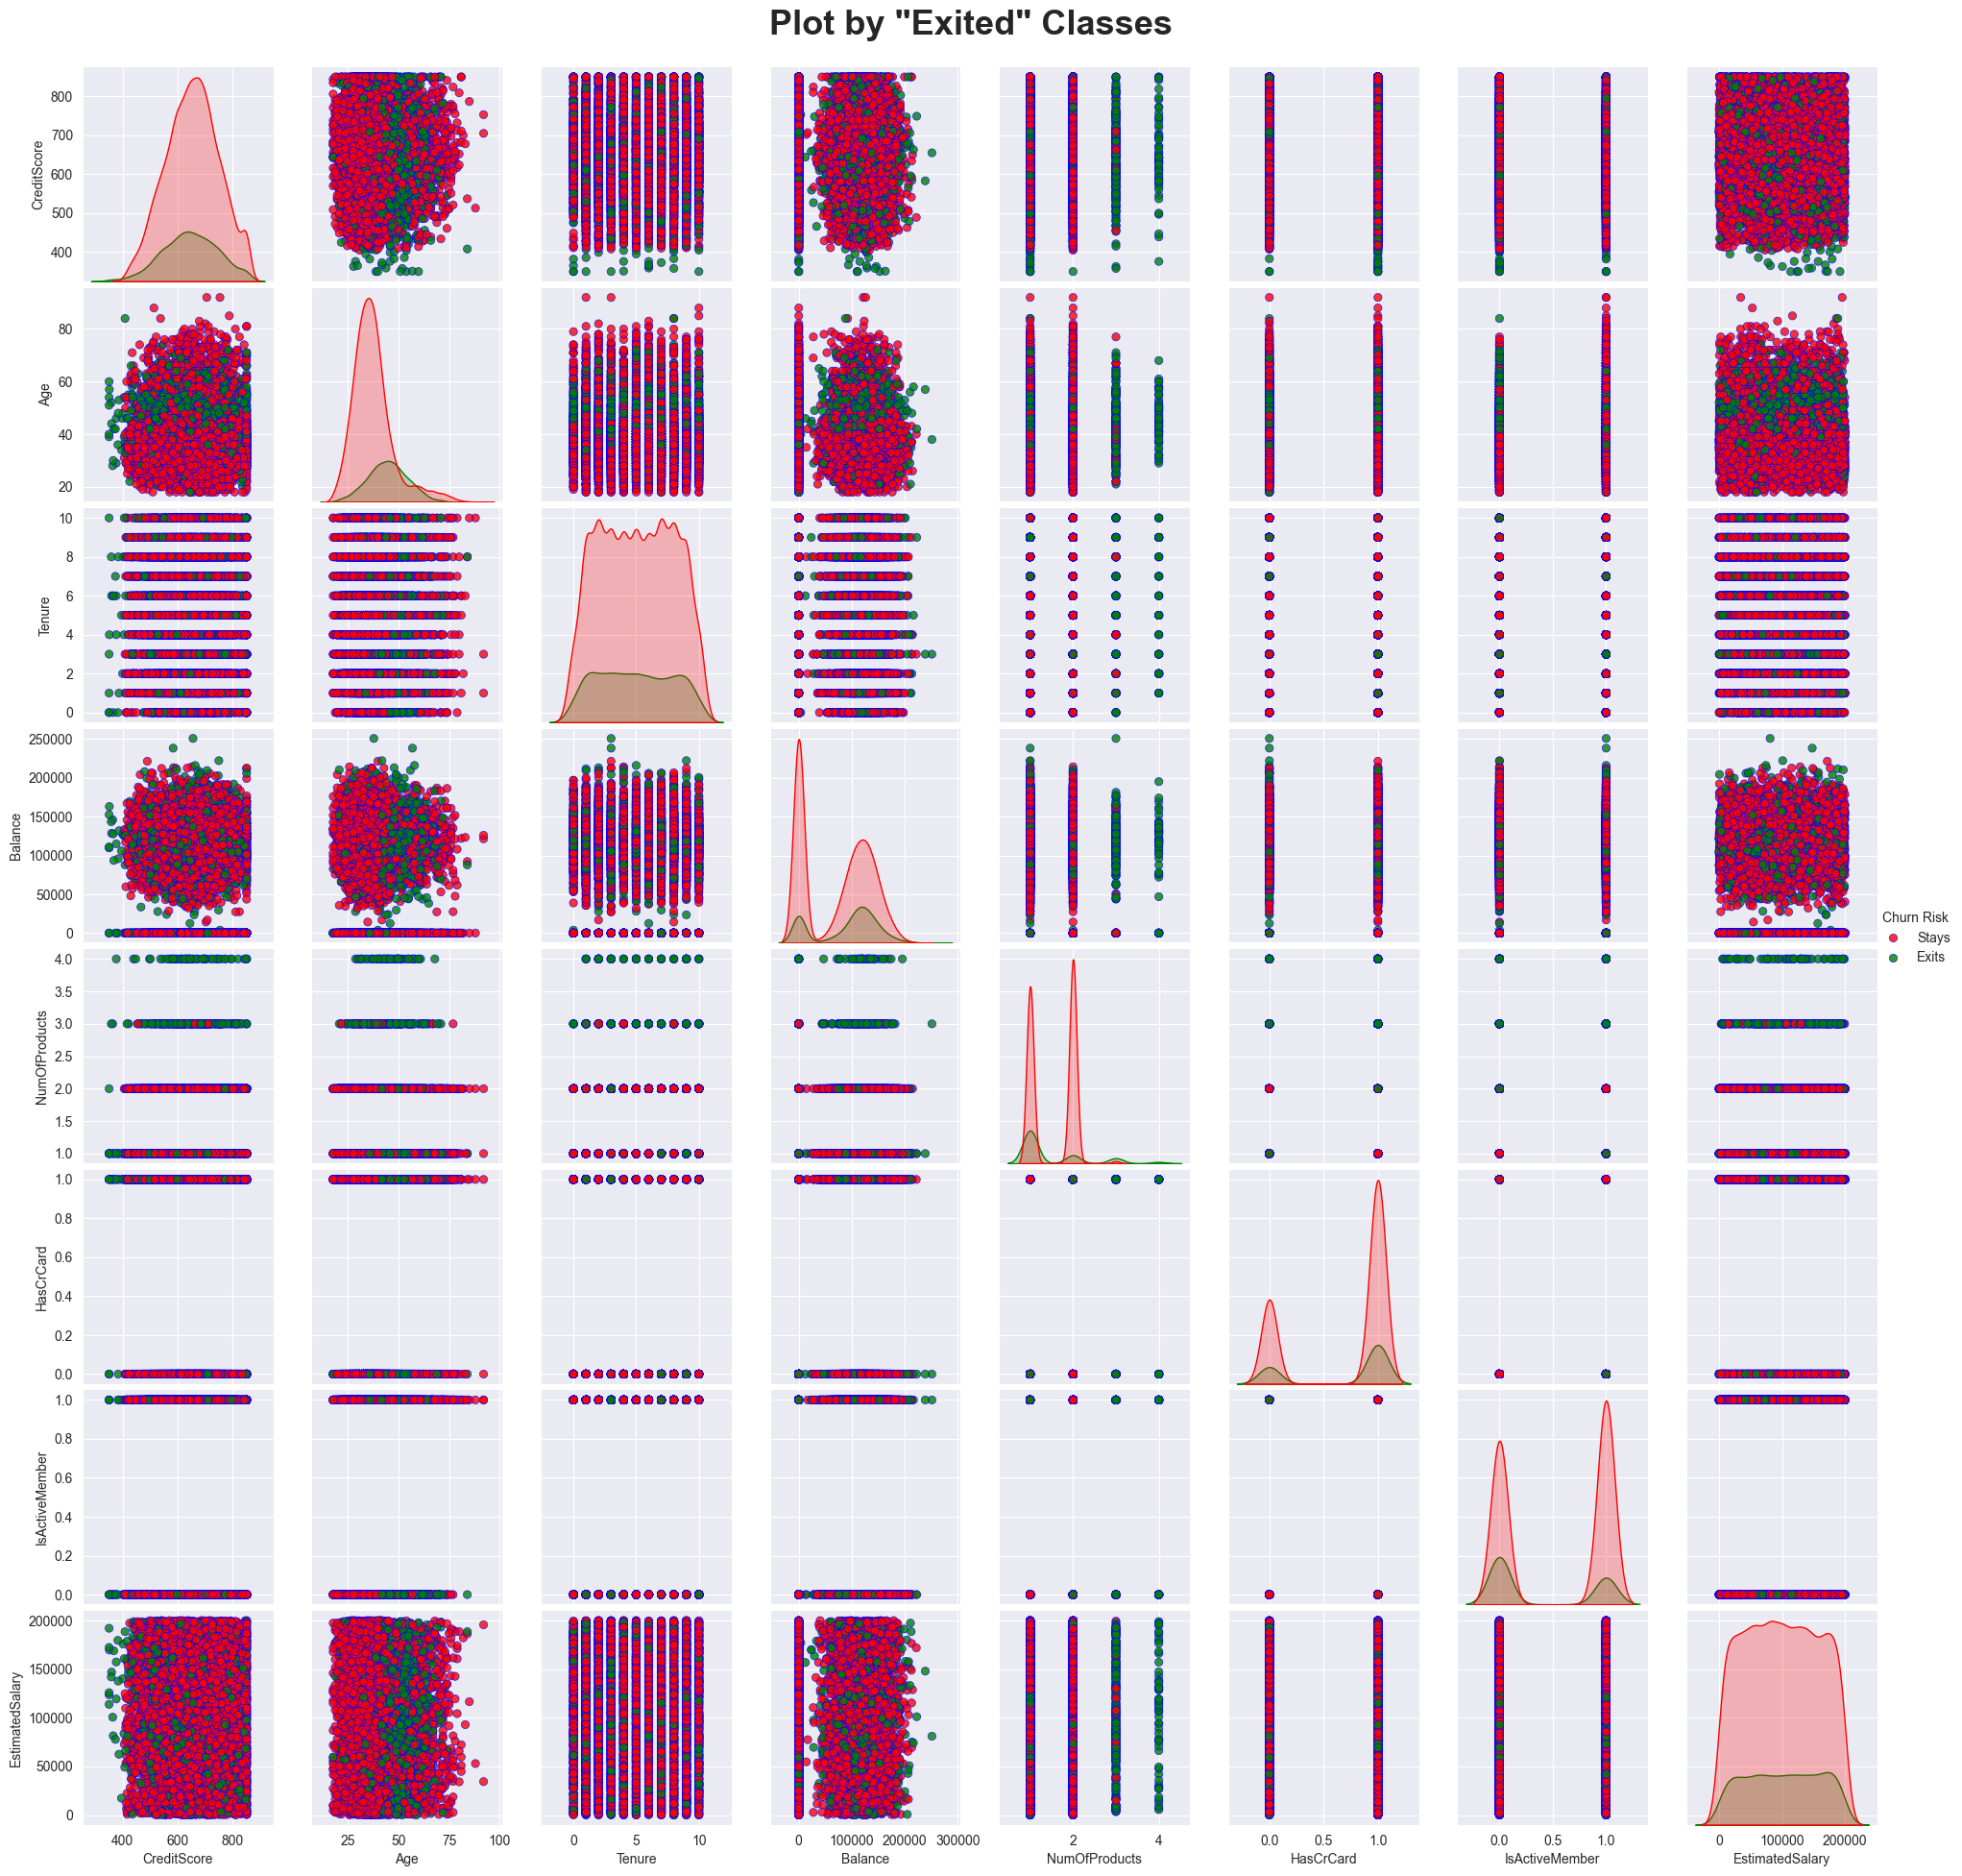

In [45]:
# Plot Seaborn's pairplot
g = sns.pairplot(df, hue='Exited',
                 palette={1 : 'green',
                          0 : 'red'},
                 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Plot by "Exited" Classes',
             fontsize=26,
             fontweight='bold')


# Update the legend
new_title = 'Churn Risk'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Stays', 'Exits']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()

The *density plots* on the diagonal make it easier to compare these distributions. We can notice that only few features have slightly different distributions. For example, from the density plot for <code style="color:steelblue">Age</code>, it could be seen that older people have slightly higher tendecy to leave the bank.

Let’s reduce the clutter by plotting only four features: <code style="color:steelblue">Age</code>, <code style="color:steelblue">IsActiveMember</code>, <code style="color:steelblue">NumOfProducts</code> and <code style="color:steelblue">Balance</code>.

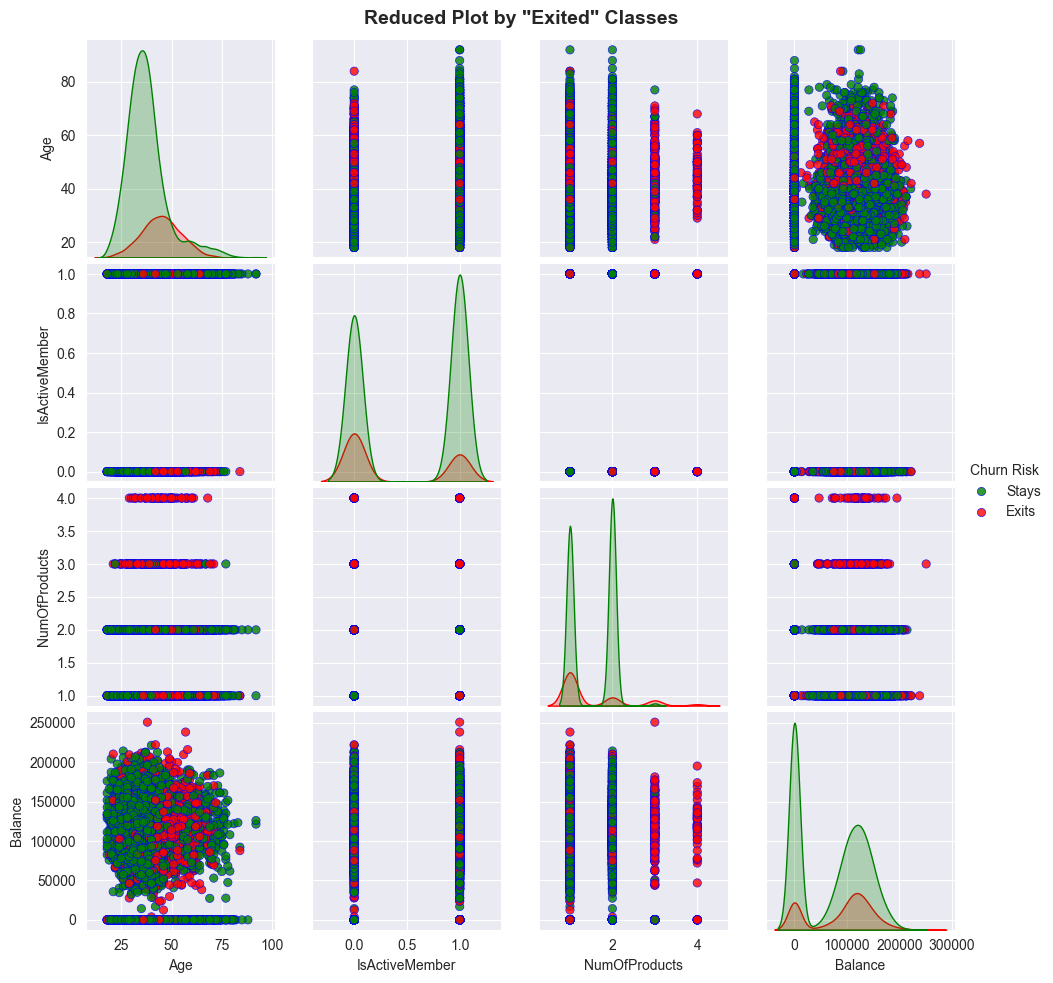

In [46]:
# Plot Seaborn's pairplot
g = sns.pairplot(df, hue='Exited',
                 vars=['Age', 'IsActiveMember', 'NumOfProducts', 'Balance'], # reduce to less features
                 palette={0 : 'green',
                          1 : 'red'},
                 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Reduced Plot by "Exited" Classes',
             fontsize=14,
             fontweight='bold')

# Update the legend
new_title = 'Churn Risk'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Stays', 'Exits']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()

From density plots we can see that older customers and customer with more products more often leaving the bank.

## Violin Plots

/var/folders/8t/1xgb90cn3ns84sssmr9z_bf40000gn/T/ipykernel_27044/2863823235.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=churn,
/var/folders/8t/1xgb90cn3ns84sssmr9z_bf40000gn/T/ipykernel_27044/2863823235.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=churn,
/var/folders/8t/1xgb90cn3ns84sssmr9z_bf40000gn/T/ipykernel_27044/2863823235.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=churn,
/var/folders/8t/1xgb90cn3ns84sssmr9z_bf40000gn/T/ipykernel_27044/2863823235.py:45: FutureWarning: 

Passing `palette` withou

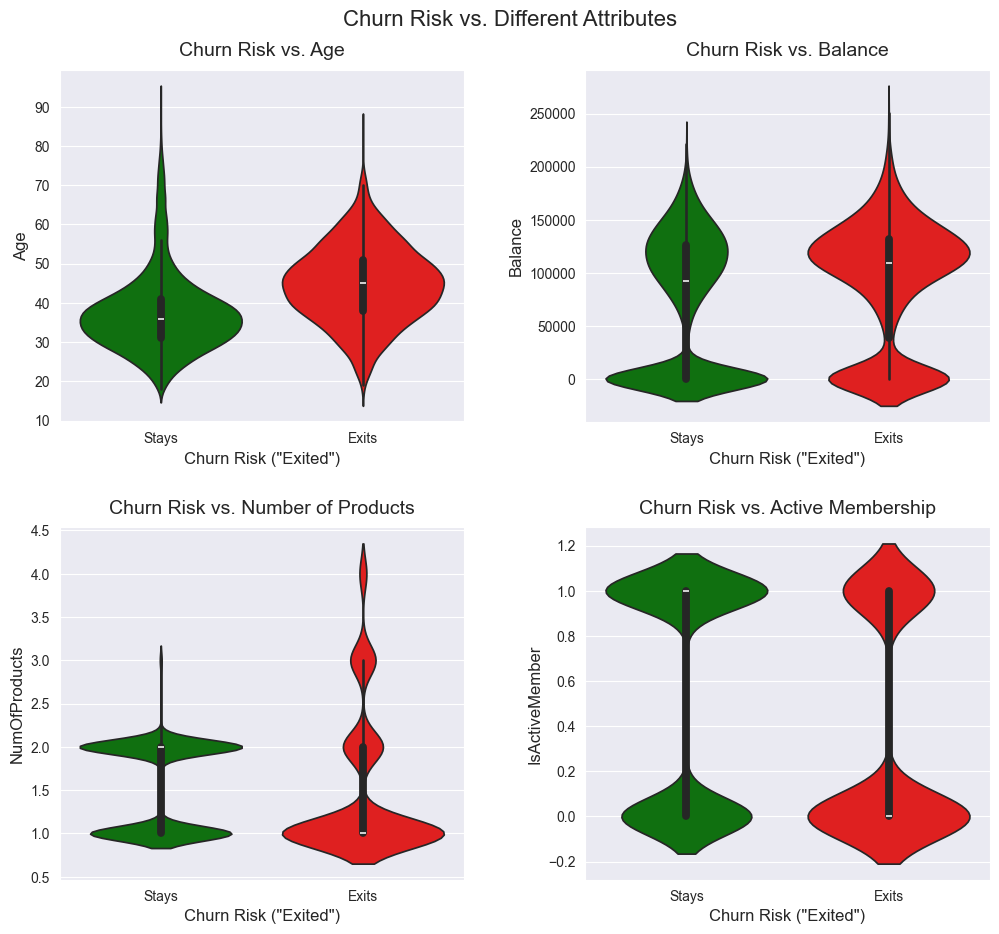

In [47]:
# Segment age by Exited and plot distributions
#  “categorical” variable Exited is a numeric
#  for plotting purposes only we will change it to real categorical variable

# Define palette
my_pal = {'Stays': 'green', 'Exits': 'red'}
# Convert to categorical
hr = {0: 'Stays', 1: 'Exits'}
churn = df['Exited'].map(hr)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Churn Risk vs. Different Attributes', fontsize=16)
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)

sns.violinplot(x=churn,
               y=df['Age'],
               order=['Stays', 'Exits'], 
               palette=my_pal,
               ax=ax1)

ax1.set_title('Churn Risk vs. Age', fontsize=14, pad=10)
ax1.set_ylabel('Age',size=12)
ax1.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=df['Balance'],
               order=['Stays', 'Exits'], 
               palette=my_pal,
               ax=ax2)

ax2.set_title('Churn Risk vs. Balance', fontsize=14, pad=10)
ax2.set_ylabel('Balance',size=12)
ax2.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=df['NumOfProducts'],
               order=['Stays', 'Exits'], 
               palette=my_pal,
               ax=ax3)

ax3.set_title('Churn Risk vs. Number of Products', fontsize=14, pad=10)
ax3.set_ylabel('NumOfProducts',size=12)
ax3.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=df['IsActiveMember'],
               order=['Stays', 'Exits'], 
               palette=my_pal,
               ax=ax4)

ax4.set_title('Churn Risk vs. Active Membership', fontsize=14, pad=10)
ax4.set_ylabel('IsActiveMember',size=12)
ax4.set_xlabel('Churn Risk ("Exited")', size=12)
plt.show()

Violin plots are confirming the earlier statement that older customers and customer with more products are more likely to leave the bank.

### Distributions of the Target Feature

In [48]:
# Define our target variable
y = df.Exited

In [49]:
y.shape

(10000,)

Let's define a small helper funtcion which displays count and percentage per class of the target feature.

In [50]:
# Function to display count and percentage per class of target feature
def class_count(a):
    counter=Counter(a)
    kv=[list(counter.keys()),list(counter.values())]
    dff = pd.DataFrame(np.array(kv).T, columns=['Exited','Count'])
    dff['Count'] = dff['Count'].astype('int64')
    dff['%'] = round(dff['Count'] / a.shape[0] * 100, 2)
    return dff.sort_values('Count',ascending=False)

In [51]:
# Let's use the function
dfcc = class_count(y)
dfcc

,Exited,Count,%
1,0,7963,79.63
0,1,2037,20.37


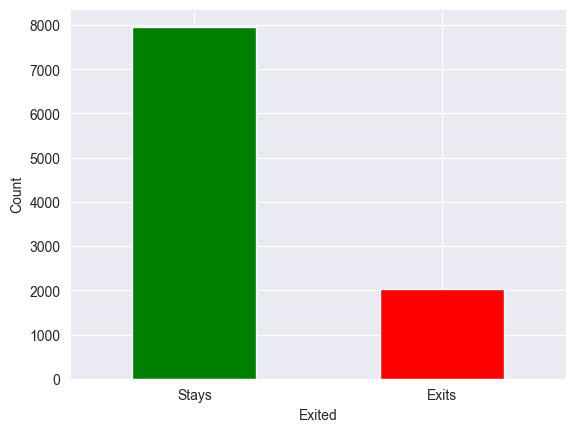

In [52]:
# Plot distribution of target variable, Exited column

labels=['Stays', 'Exits']
dfcc.plot.bar(x='Exited', y='Count', color=['g', 'r'], legend=False)
plt.xticks(dfcc['Exited'], labels, rotation=0)
plt.ylabel('Count')
plt.show()

We can see that our dataset is imbalanced. The majority class, "Stays" (0), has around 80% data points and the minority class, "Exits" (1), has around 20% datapoints.

To address this, in our machine learning algorithms we will use SMOTE (Synthetic Minority Over-sampling Technique).

## Finalizing the Dataframe

In [53]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [24]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


Our dataframe looks good and it is ready to be saved.

#### Save the dataframe as the analytical base table

In [55]:
# Save analytical base table
df.to_csv("../data/analytical_base_table.csv", index=False)


